### Project Description

The objective of this project is to develop an intelligent system employing data science and machine learning to automate the categorization of individuals into specific credit score categories.  

It reduces the manual effort involved in credit assessment, optimising operational processes and it aims to enable more customised financial services by precisely classifying customers based on their creditworthiness.  


### Problem Statement

This project aims to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.Specifically, we will use machine learning to build a machine learning model that can classify the credit score using a person’s credit-related information.

### Dataset description

1. ID: Represents a unique identification of an entry.
2. Customer_ID: Represents a unique identification of a person.
3. Month: Represents the month of the year.
4. Name: Represents the name of a person.
5. Age: Represents the age of the person.
6. SSN: Represents the social security number of a person.
7. Occupation: Represents the occupation of the person.
8. Annual Income: Represents the annual income of the person.
9. Monthly Inhand Salary: Represents the monthly base salary of a person.
10. Num Bank Accounts: Represents the number of bank accounts a person holds.
11. Num Credit Card: Represents the number of other credit cards held by a person.
12. Interest_Rate: Represents the interest rate on a credit card.
13. Num of Loan: Represents the number of loans taken from the bank.
14. Type of Loan: Represents the types of loan taken by a person.
15. Delay from due date: Represents the average number of days delayed from the payment date.
16. Num of Delayed Payment: Represents the average number of payments delayed by a person.
17. Changed Credit Limit: Represents the percentage change in the credit card limit.
18. Num Credit Inquiries: Represents the number of credit card inquiries.
19. Credit Mix: Represents the classification of the mix of credits.
20. Outstanding Debt: Represents the remaining debt to be paid (in USD).
21. Credit Utilization Ratio: Represents the utilization ratio of a credit card.
22. Credit History Age: Represents the age of the credit history of the person.
23. Payment of Min Amount: Represents whether only the minimum amount was paid by the person.
24. Total EMI per month: Represents the monthly EMI payments (in USD).
25. Amount invested monthly: Represents the monthly amount invested by the customer (in USD).
26. Payment Behaviour: Represents the payment behavior of the customer (in USD).
27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD).
28. Credit Score: Represents the bracket of credit score (Poor, Standard, Good).

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
custom_palette = ["#4631ad", "#a552a0", "#e8d1a0", "#61bfa0", "#7382a0", "#4c8ba0"]
sns.set(style="whitegrid", palette=custom_palette)

### Loading the dataset

In [3]:
data= pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Internship_ICT\credit.csv')
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


# Exploratory Data Analysis

### Understanding the data

In [4]:
df1 = data.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df1.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Checking null values

In [7]:
df1.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

__There are no null values in the data__

### Checking duplicate rows

In [8]:
duplicates = df1[df1.duplicated()]
num_duplicates = duplicates.shape[0]
num_duplicates

0

__There are no duplicate rows__

In [9]:
df1.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

### Analysing object columns

In [10]:
obj_columns = df1.select_dtypes(include=['object']).columns.tolist()
obj_columns

['Name',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

#### Occupation

In [11]:
df1['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

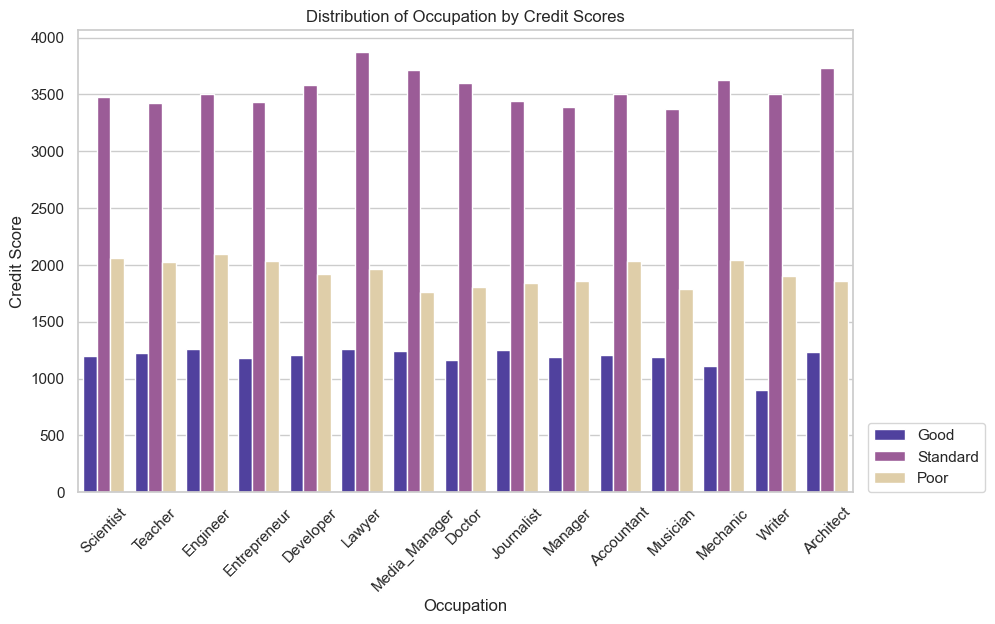

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Occupation', hue='Credit_Score')
plt.title('Distribution of Occupation by Credit Scores')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.legend(loc=(1.02,0))
plt.show()

Across all occupations, individuals tend to have a standard credit score more frequently, followed by poor credit scores, and finally, good credit scores.This insight can be crucial for understanding the creditworthiness of individuals across various occupations  

However, it’s important to consider that correlation does not imply causation, and individual creditworthiness may vary regardless of occupation

#### Credit Mix

An ideal credit mix includes a variety of revolving accounts, like credit cards, and installment accounts, like loans.If you want to make your credit score as perfect as possible, however, having credit mix will help you get there.

In [13]:
df1['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

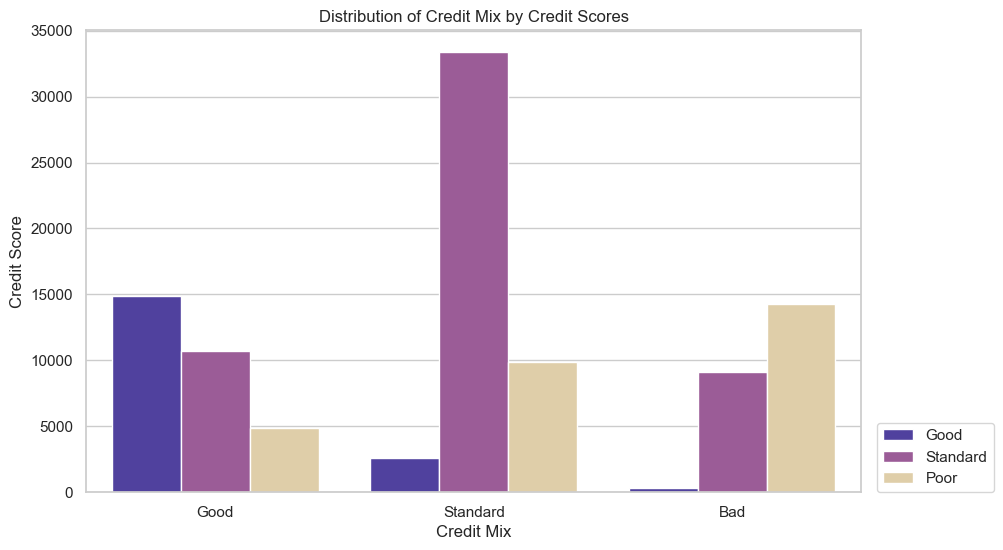

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Credit_Mix', hue='Credit_Score')
plt.title('Distribution of Credit Mix by Credit Scores')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

If the aspiration is to optimize one's credit score to the highest attainable level, it becomes imperative to consider the significant role that credit mix plays in achieving this objective. A comprehensive credit mix, encompassing a diverse range of credit types such as revolving credit (e.g., credit cards), installment loans (e.g., mortgages, auto loans), and other forms of credit, emerges as a critical factor in bolstering one's creditworthiness.  

Here also we can see relationship between credit score and credit mix

#### Payment of Min Amount

In [15]:
df1['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

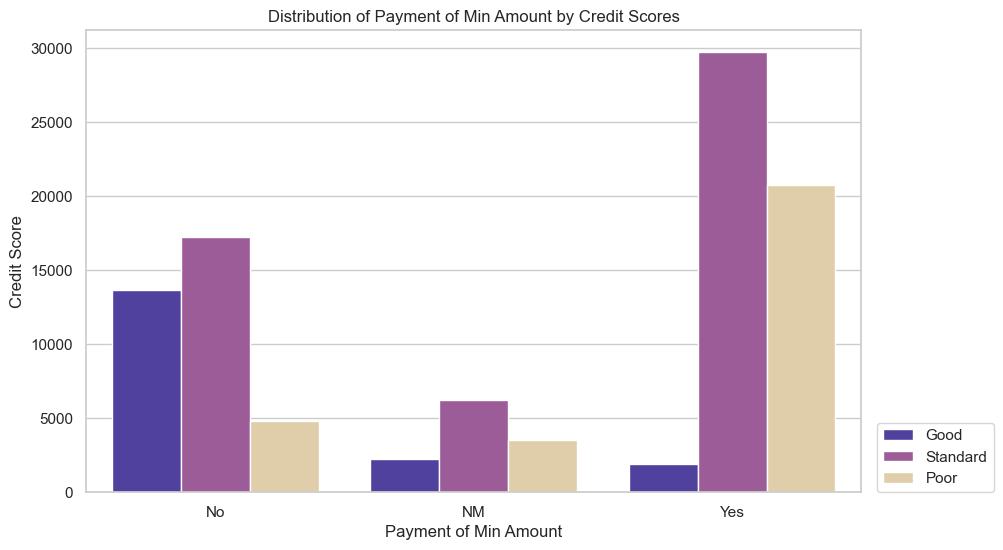

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Payment_of_Min_Amount', hue='Credit_Score')
plt.title('Distribution of Payment of Min Amount by Credit Scores')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

1. Good Credit Scores: Individuals with good credit scores tend to make minimum payments more frequently.
2. Poor Credit Scores: Conversely, those with lower credit scores are less consistent in making minimum payments.

#### Payment Behaviour

In [17]:
df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

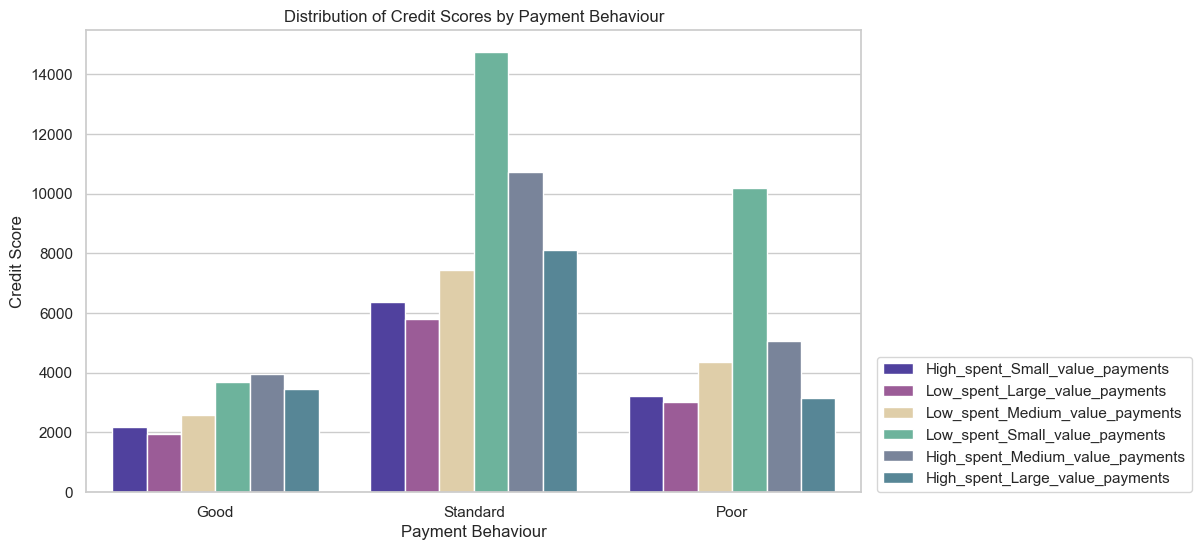

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Credit_Score', hue='Payment_Behaviour')
plt.title('Distribution of Credit Scores by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

1. Standard Payment Behavior: Individuals with standard payment behavior tend to have the highest credit scores. The majority of them exhibit low spending on small value payments.
2. Poor Payment Behavior: While poor payment behavior shows a balanced distribution, it still has significantly lower credit score counts compared to standard behavior.
3. Good Payment Behavior: People with good payment behavior generally have lower counts across all spending categories, indicating a lower credit score.

#### Type of Loan

In [19]:
label_encoder = LabelEncoder()

In [20]:
df1['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [21]:
df1['Type_of_Loan'].nunique()

6261

In [22]:
df1['Type_of_loan_encoded'] = label_encoder.fit_transform(df1['Type_of_Loan'])

In [23]:
df1.shape

(100000, 29)

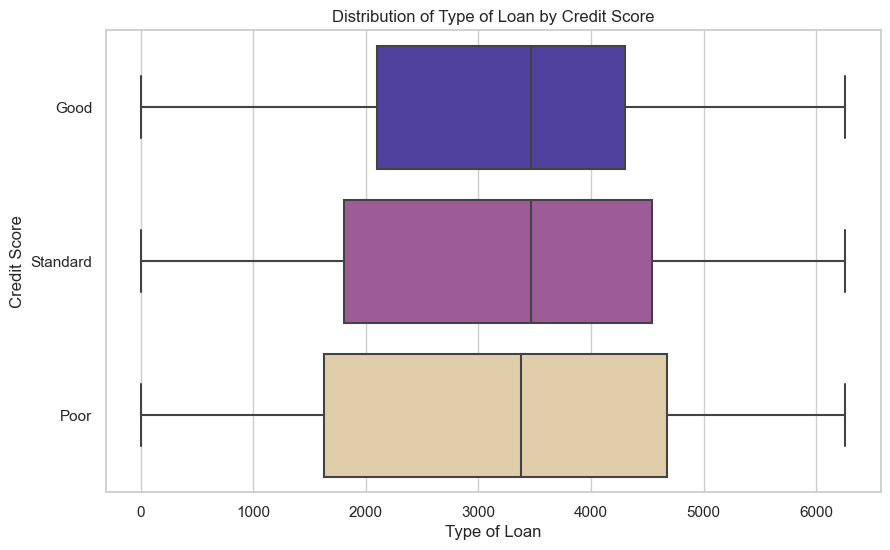

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_loan_encoded', y='Credit_Score', data=df1)
plt.title('Distribution of Type of Loan by Credit Score')
plt.xlabel('Type of Loan')
plt.ylabel('Credit Score')
plt.show()

While credit score plays a pivotal role in determining loan eligibility and terms, it is essential to recognize that the type of loan alone cannot definitively ascertain whether an individual has a good, poor or standard credit score. 

#### Conclusion

Upon analyzing the categorical variables in the dataset, it was found that the 'type of loan' column contains a large number of unique categorical values and exhibits less dependence on the credit score. Therefore, we can remove the 'type of loan' column from the dataset .

### Analysing numerical columns

In [25]:
df2 = data.copy()

In [26]:
score_mapping = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

In [27]:
df2['Credit_Score'] = df2['Credit_Score'].replace(score_mapping)

#### Correlation

In [28]:
cor = df2.corr(numeric_only = True)

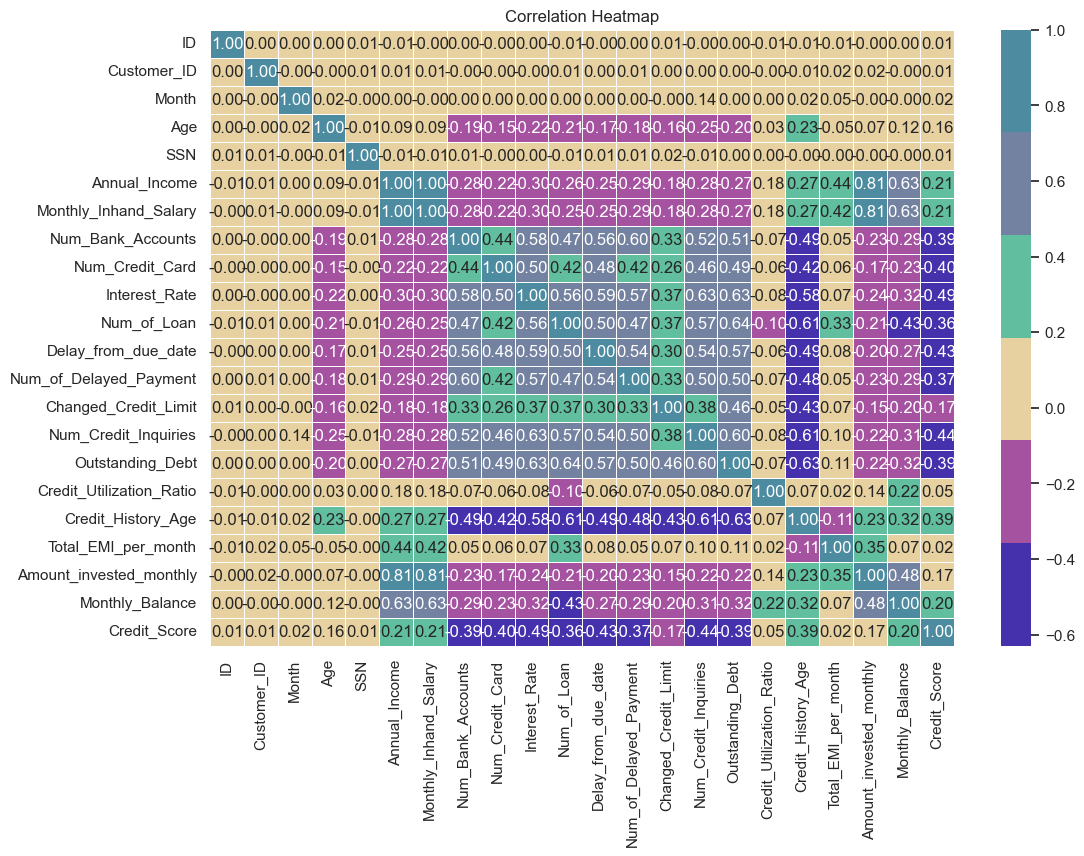

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

After conducting correlation analysis on the dataset, it is observed that the variables 'ID', 'Customer_ID', 'Month', and 'SSN' exhibit nearly zero correlation with other variables in the dataset. As a result, these variables are unlikely to contribute significantly to the analysis and modeling process. Therefore, we can drop these variables from the dataset.  

Monthly in-hand salary" and "annual income" have a high correlation with the credit score, and since they are highly correlated with each other, you can remove one of these features to reduce redundancy in your dataset.

#### Outliers detection

In [30]:
df3 = data.copy()

In [31]:
Col_to_drop = ['ID','Customer_ID','Month','Name','SSN']
df3.drop(columns = Col_to_drop, inplace = True)

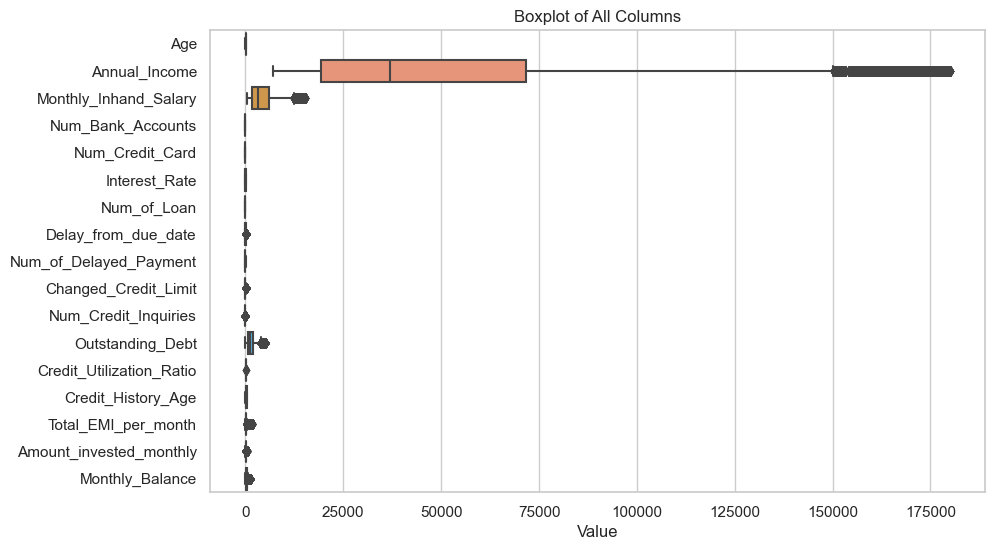

In [32]:
# To find the columns with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, orient="h")
plt.title('Boxplot of All Columns')
plt.xlabel('Value')
plt.show()

Upon analyzing the data, it is identified that seven columns exhibit outliers.

In [33]:
selected_columns = ['Annual_Income','Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly']

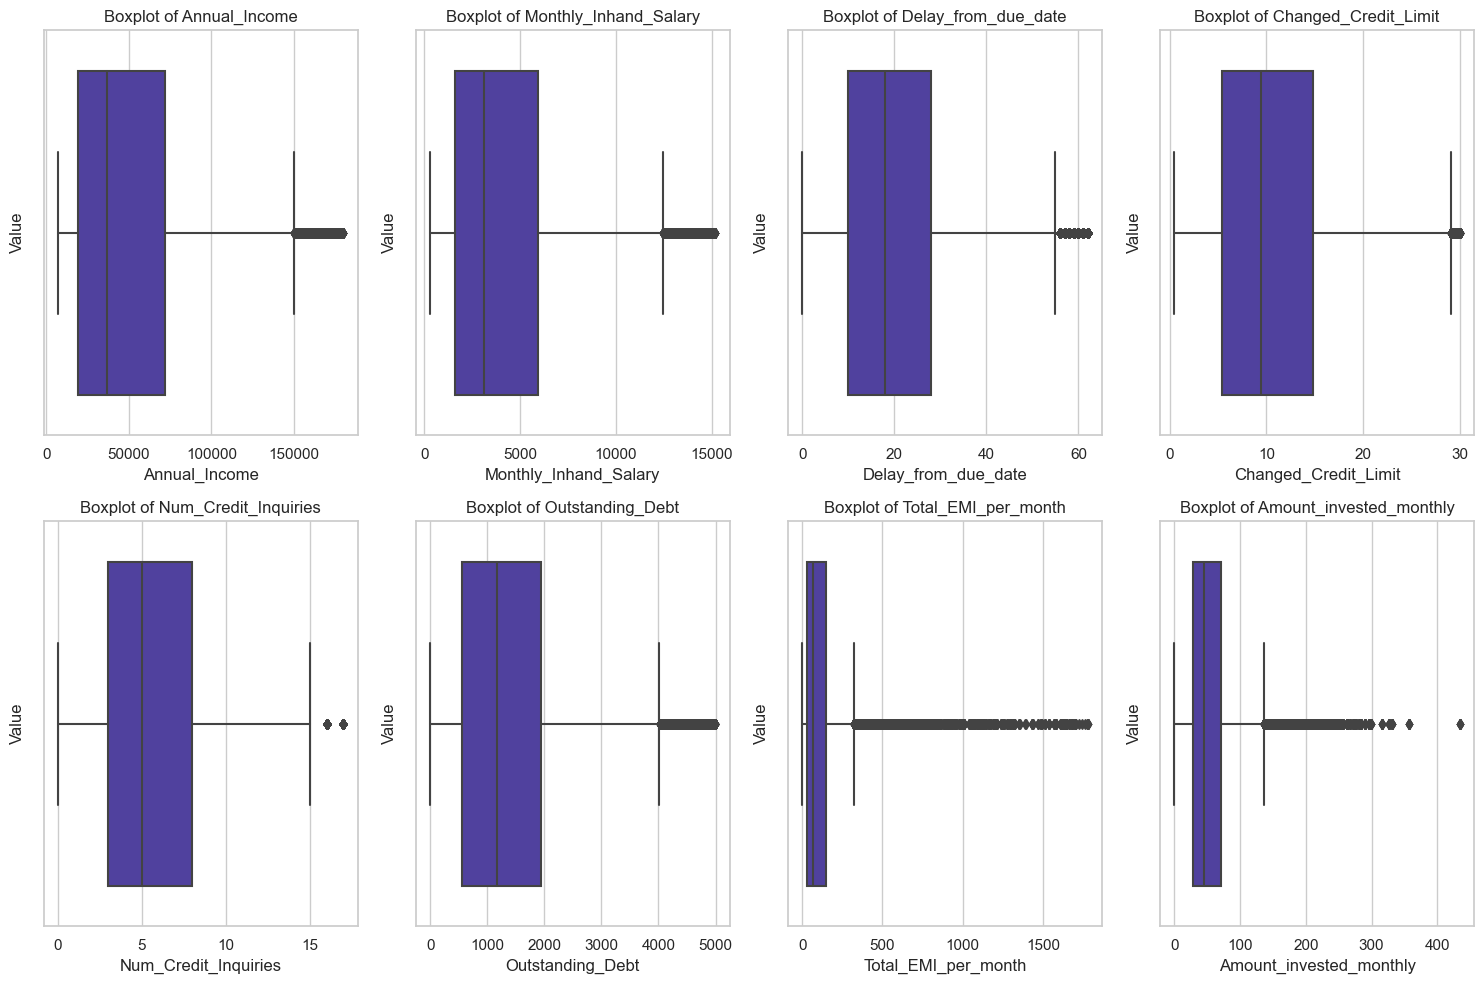

In [34]:
# Setting up subplots
num_cols = 4
num_rows = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(x=column, data=df3, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

Only two columns (total_EMI_per_month and Amount_invested_monthly) has high outlier impact

### Mutual Information Score (MI Score)

It will help you to recognize the most valuable variables for the prediction.

In [35]:
obj_columns = df3.select_dtypes(include=['object']).columns

In [36]:
encoder = OrdinalEncoder()
df3[obj_columns] = encoder.fit_transform(df3[obj_columns])

In [37]:
y = df3['Credit_Score']
x = df3.drop(columns=['Credit_Score'])

In [38]:
mi_scores = mutual_info_classif(x, y)

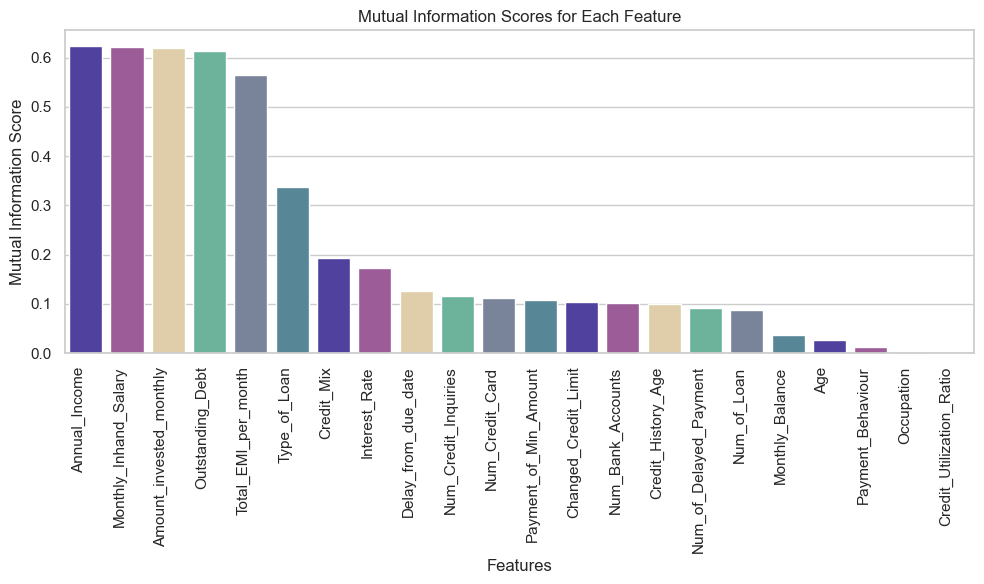

In [39]:
sorted_mi_scores = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

# Create a DataFrame from the sorted data
df_mi = pd.DataFrame({'Features': x.columns, 'MI Score': mi_scores})
df_mi = df_mi.sort_values(by='MI Score', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Features', y='MI Score', data=df_mi, palette= custom_palette)
plt.title('Mutual Information Scores for Each Feature')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Conclusion

After computing mutual information scores for each feature, it is observed that the following five features have relatively low impact on the credit score: Monthly_Balance, Age, Payment_Behaviour, Occupation, and Credit_Utilization_Ratio.This suggests that these features may not significantly contribute to the prediction of credit scores. Therefore, we can remove these columns from the dataset.

### Checking data balance

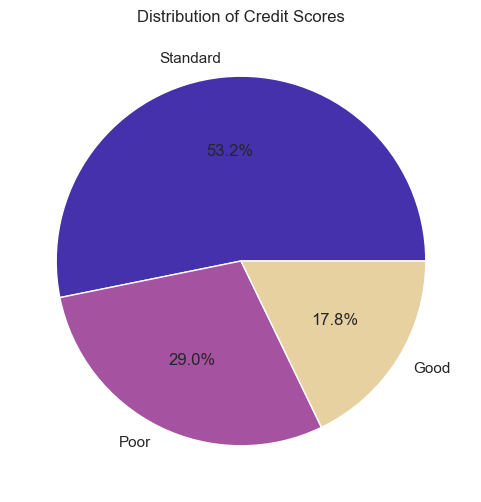

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [40]:
plt.figure(figsize=(6, 6))
data['Credit_Score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Credit Scores')
plt.ylabel('')
plt.show()
data['Credit_Score'].value_counts()

The dataset suffers from class imbalance, indicating a significant inconsistency in the distribution of target classes. This imbalance could potentially bias the predictive model towards the majority class and lead to poor performance in predicting the minority class.

# Data Preprocessing

### Dropping unwanted columns

In [41]:
data_preprocessing = data.copy()

In [42]:
Cols_to_drop = ['ID','Customer_ID','Month','Name','SSN','Payment_Behaviour','Age' , 'Occupation', 'Credit_Utilization_Ratio']
data_preprocessing.drop(columns = Cols_to_drop, inplace = True)
data_preprocessing.shape

(100000, 19)

### Encoding

In [43]:
data_preprocessing.dtypes

Annual_Income              float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts          float64
Num_Credit_Card            float64
Interest_Rate              float64
Num_of_Loan                float64
Type_of_Loan                object
Delay_from_due_date        float64
Num_of_Delayed_Payment     float64
Changed_Credit_Limit       float64
Num_Credit_Inquiries       float64
Credit_Mix                  object
Outstanding_Debt           float64
Credit_History_Age         float64
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly    float64
Monthly_Balance            float64
Credit_Score                object
dtype: object

In [44]:
# Type of loan
label_encoder = LabelEncoder()

data_preprocessing['Type_of_Loan'] = label_encoder.fit_transform(data_preprocessing['Type_of_Loan'])

In [45]:
# Credit mix
Credit_Mix_catagories = ['Good', 'Standard', 'Bad']

encoder_Payment_of_Min_Amount = OrdinalEncoder(categories=[Credit_Mix_catagories])

data_preprocessing['Credit_Mix'] = encoder_Payment_of_Min_Amount.fit_transform(data_preprocessing[['Credit_Mix']])

In [46]:
# Payment of min amount
Payment_of_Min_Amount_catagories = ['No', 'NM', 'Yes']

encoder_Payment_of_Min_Amount = OrdinalEncoder(categories=[Payment_of_Min_Amount_catagories])

data_preprocessing['Payment_of_Min_Amount'] = encoder_Payment_of_Min_Amount.fit_transform(data_preprocessing[['Payment_of_Min_Amount']])

In [47]:
# Credit score
credit_Score_categories = ['Poor', 'Standard', 'Good']

encoder_credit_Score = OrdinalEncoder(categories=[credit_Score_categories])

data_preprocessing['Credit_Score'] = encoder.fit_transform(data_preprocessing[['Credit_Score']])

Label Encoder is suitable for nominal categorical variables without an inherent order, while Ordinal Encoder is suitable for ordinal categorical variables with a meaningful order or ranking

# Feature engineering

In [48]:
# Income
winsorized_income = mstats.winsorize(data_preprocessing['Annual_Income'], limits=[0.05, 0.05])
log_income = np.log(winsorized_income)
data_preprocessing['Annual_Income_log'] = log_income

1. Applied Winsorization to handle outliers, limiting extreme values to the 5th and 95th percentiles
2. Applied a logarithmic transformation to the Winsorized income data

In [49]:
# Calculating the total number of accounts (Bank Accounts + Credit Cards)

data_preprocessing['Total_Num_Accounts'] = data_preprocessing['Num_Bank_Accounts'] + data_preprocessing['Num_Credit_Card']

# Calculating the total outstanding debt per account

data_preprocessing['Debt_Per_Account'] = data_preprocessing['Outstanding_Debt'] / data_preprocessing['Total_Num_Accounts']

# Calculating the ratio of outstanding debt to annual income

data_preprocessing['Debt_to_Income_Ratio'] = data_preprocessing['Outstanding_Debt'] / data_preprocessing['Annual_Income']

# Calculating the total number of delayed payments per account

data_preprocessing['Delayed_Payments_Per_Account'] = data_preprocessing['Num_of_Delayed_Payment'] / data_preprocessing['Total_Num_Accounts']

# Calculating the total monthly expenses (EMI + Monthly Investments) 

data_preprocessing['Total_Monthly_Expenses'] = data_preprocessing['Total_EMI_per_month'] + data_preprocessing['Amount_invested_monthly']

In [50]:
X1 = data_preprocessing.drop('Credit_Score', axis=1) 
y1 = data_preprocessing['Credit_Score']

In [51]:
mi_scores = mutual_info_classif(X1, y1)

df_mi = pd.DataFrame({'Feature': X1.columns, 'MI Score': mi_scores})
df_mi = df_mi.sort_values(by='MI Score', ascending=False)

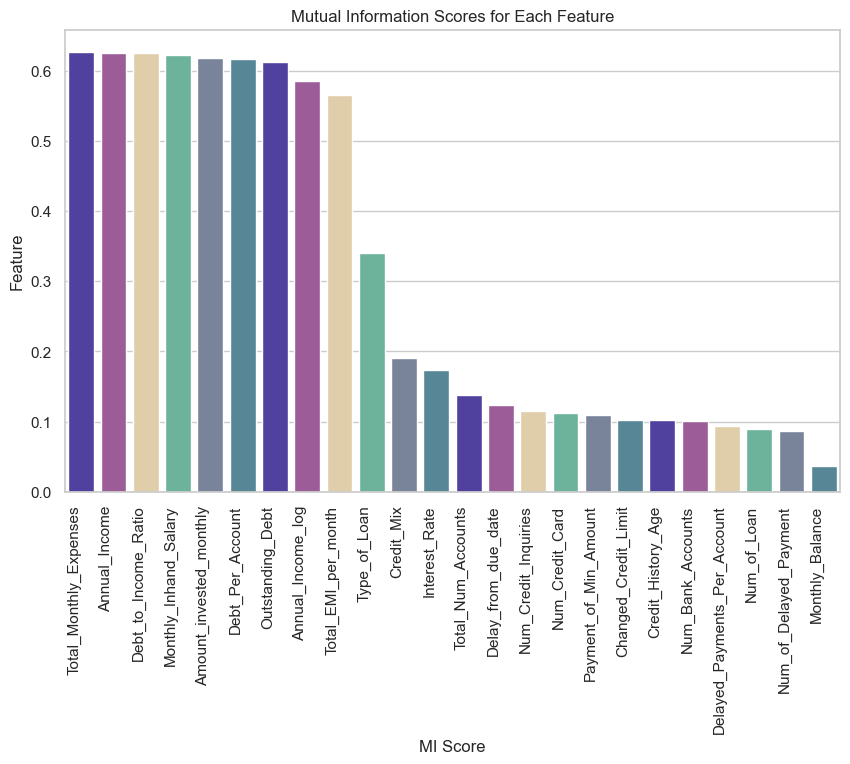

In [52]:
# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='MI Score', data=df_mi, palette= custom_palette)
plt.title('Mutual Information Scores for Each Feature')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.xticks(rotation=90, ha='right')
plt.show()

In [53]:
data_preprocessing.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Annual_Income_log', 'Total_Num_Accounts', 'Debt_Per_Account',
       'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account',
       'Total_Monthly_Expenses'],
      dtype='object')

In [54]:
col_drop = ['Monthly_Balance', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delayed_Payments_Per_Account', 'Changed_Credit_Limit']
data_preprocessing.drop(columns = col_drop, inplace = True)
data_preprocessing.shape

(100000, 20)

### Balancing the dataset

 * Imbalanced datasets can lead to biased models that favor the majority class.
 * Balancing the data helps improve the performance of machine learning models, especially for metrics like accuracy, precision, recall, and F1-score.
 * By balancing the data, the model is less likely to overfit to the majority class and can generalize better to unseen data.

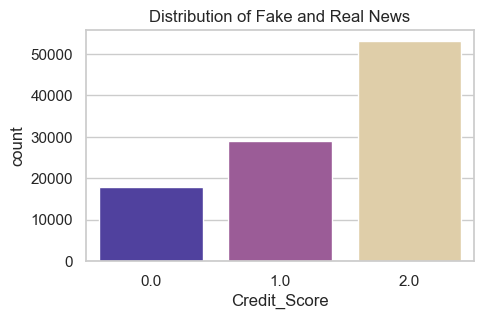

2.0    53174
1.0    28998
0.0    17828
Name: Credit_Score, dtype: int64

In [55]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Credit_Score', data=data_preprocessing)
plt.title('Distribution of Fake and Real News')
plt.show()
data_preprocessing['Credit_Score'].value_counts()

In [56]:
smote = SMOTE(random_state=42)

In [57]:
X = data_preprocessing.drop('Credit_Score', axis=1) 
y = data_preprocessing['Credit_Score']

In [58]:
X_resampled, y_resampled = smote.fit_resample(X, y)

0.0    53174
2.0    53174
1.0    53174
Name: Credit_Score, dtype: int64

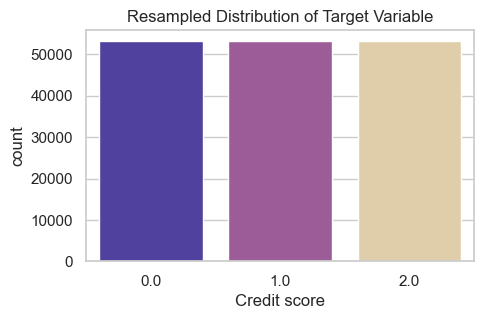

In [59]:
plt.figure(figsize=(5, 3))
sns.countplot(x=y_resampled )
plt.title('Resampled Distribution of Target Variable')
plt.xlabel('Credit score')
plt.ylabel('count')
y_resampled.value_counts()

In [60]:
scaler = StandardScaler()

In [61]:
X_scales = scaler.fit_transform(X_resampled)

## Splitting the data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scales, y_resampled, test_size=0.2, random_state=42)

## Training the model

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "Decision Tree classifier" : DecisionTreeClassifier(),
}

In [65]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(report)

K-Nearest Neighbors Accuracy: 0.8677
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     10710
         1.0       0.86      0.93      0.89     10578
         2.0       0.86      0.73      0.79     10617

    accuracy                           0.87     31905
   macro avg       0.87      0.87      0.86     31905
weighted avg       0.87      0.87      0.86     31905

Random Forest Accuracy: 0.8908
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     10710
         1.0       0.89      0.91      0.90     10578
         2.0       0.87      0.81      0.84     10617

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.89      0.89      0.89     31905

GradientBoostingClassifier Accuracy: 0.7525
GradientBoostingClassifier Classification Repo

* Random Forest achieved the highest accuracy of 89.08%, closely followed by K-Nearest Neighbors with an accuracy of 86.77%.
* Random Forest also achieved the highest precision, recall, and F1-score for each class, indicating its overall better performance in terms of classification metrics.  

So random forest model is selected.

In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

In [67]:
result = confusion_matrix(y_test,rf_pred)

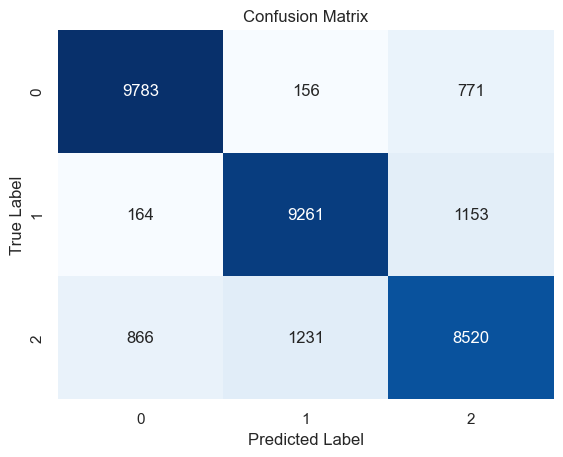

In [68]:
sns.heatmap(result, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* The classifier performs well in predicting class 0 and class 1 instances, as indicated by the high true positive counts and low false positive and false negative counts.  
* Class 2 has a higher number of false positive and false negative predictions, indicating that the classifier struggles more with predicting class 2 instances accurately.